### Dados json

In [ ]:
import requests
import json
import networkx as nx

url = "https://raw.githubusercontent.com/benedekrozemberczki/pytorch_geometric_temporal/refs/heads/master/dataset/montevideo_bus.json"
response = requests.get(url)
data = json.loads(response.text)

# Create a graph
graph = nx.Graph()

# Access the 'bus_stop' data within 'nodes' and add it as nodes to the graph
for node in data['nodes']:  # Iterate through the 'nodes' list
    bus_stop = node.get('bus_stop')  # Get the 'bus_stop' value from each node
    if bus_stop:
        graph.add_node(bus_stop)

# Show the nodes in the graph
#graph.nodes

Edges

In [ ]:


# Add edges to the graph based on 'links' data
for link in data['links']:
    source = link.get('source')
    target = link.get('target')
    if source is not None and target is not None:
        graph.add_edge(source, target)

# Show the edges in the graph
edges = list(graph.edges)
print("Edges in the graph:")
print(edges)
print("Number of edges:", len(edges))

Edges in the graph:
[(5289, 5290), (5290, 5291), (5291, 5292), (5292, 5293), (5293, 2510), (2510, 2511), (2511, 2512), (2512, 2513), (2513, 2514), (2514, 2515), (2515, 2516), (2516, 2518), (2518, 5199), (5199, 2519), (2519, 2520), (2520, 2521), (2521, 2522), (2522, 2523), (2523, 2524), (2524, 2022), (2022, 2023), (2023, 2525), (2525, 2526), (2526, 2527), (2527, 2528), (2528, 2529), (2529, 2530), (2530, 2531), (2531, 2532), (2532, 2533), (2533, 2534), (2534, 2535), (2535, 2536), (2536, 2537), (2537, 2538), (2538, 2540), (2538, 2619), (2540, 2541), (2541, 2542), (2542, 2543), (2543, 2544), (2544, 3209), (2544, 6197), (3209, 2546), (2546, 2547), (2546, 6197), (2546, 6194), (2547, 2548), (2547, 3215), (2548, 3215), (3215, 3216), (3216, 2549), (3216, 3525), (2549, 3217), (3217, 3219), (3219, 3221), (3221, 3223), (3223, 3225), (3225, 3227), (3227, 3228), (3228, 3230), (3230, 3231), (3231, 3232), (3232, 3233), (3233, 4207), (4207, 3241), (3241, 4908), (4908, 4010), (4010, 4012), (4012, 3912),

## Weigths on Edges

In [ ]:
import requests
import json
import numpy as np
url = "https://raw.githubusercontent.com/benedekrozemberczki/pytorch_geometric_temporal/refs/heads/master/dataset/montevideo_bus.json"
response = requests.get(url)
data = json.loads(response.text)

# Assuming 'y' and 'X' are within the 'nodes' key and are lists
if 'nodes' in data and isinstance(data['nodes'], list):
    if len(data['nodes']) > 0 and isinstance(data['nodes'][0], dict):  # Check if nodes are dictionaries
        #Check if y and X are available
        if 'y' in data['nodes'][0] and 'X' in data['nodes'][0]:
            y_values = [node['y'] for node in data['nodes']]

            # Convert to numpy array for easier handling and printing
            y = np.array(y_values)

            # Print the first row of y
            if len(y) > 0:
              print(y[0])
            else:
              print("The 'y' array is empty.")

        else:
            print("'y' or 'X' not found in the node dictionaries.")
    else:
        print("The 'nodes' key does not contain a list of dictionaries.")
else:
    print("The 'nodes' key is missing or not a list in the JSON data.")

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1
 1 1 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 2 0 0 0 0 2 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 2 3 1 1 0 1 1 3 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 3 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 3 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 2 

In [ ]:


# Assuming 'y', 'graph', and 'data' are already defined from the previous code

if 'y' in locals() and 'graph' in locals() and 'data' in locals():
    graph_dict = {}

    # Get all nodes from the graph to use as positions
    node_positions = list(graph.nodes())  # Or any suitable way to define node positions


    #Iterate through each timestamp
    for t in range(y.shape[1]):
        edge_weights_at_time_t = {}
        weight_node = y[:, t]

        # Iterate through edges
        for u, v in graph.edges():
            if u in node_positions and v in node_positions:
              # Assuming node IDs are consistent between the graph and y data
                try:
                    weight = weight_node[list(graph.nodes()).index(u)] #index of u
                    edge_weights_at_time_t[(u,v)] = int(weight) # Convert weight to integer
                except (IndexError, ValueError):
                    print(f"Warning: Node '{u}' or '{v}' not found in 'y' data at time {t}.")
                    continue
            else:
                print(f"Warning: Node '{u}' or '{v}' not found in node_positions.")

        print(f"Edge weights at time {t}: {edge_weights_at_time_t}")

        graph_dict[t] = edge_weights_at_time_t #save the edge weights for each time step

else:
    print("'y', 'graph', or 'data' not defined.")

Edge weights at time 0: {(5289, 5290): 0, (5290, 5291): 0, (5291, 5292): 0, (5292, 5293): 0, (5293, 2510): 0, (2510, 2511): 0, (2511, 2512): 0, (2512, 2513): 0, (2513, 2514): 0, (2514, 2515): 0, (2515, 2516): 0, (2516, 2518): 0, (2518, 5199): 0, (5199, 2519): 0, (2519, 2520): 0, (2520, 2521): 0, (2521, 2522): 0, (2522, 2523): 0, (2523, 2524): 0, (2524, 2022): 0, (2022, 2023): 0, (2023, 2525): 0, (2525, 2526): 0, (2526, 2527): 0, (2527, 2528): 0, (2528, 2529): 0, (2529, 2530): 0, (2530, 2531): 0, (2531, 2532): 0, (2532, 2533): 0, (2533, 2534): 0, (2534, 2535): 0, (2535, 2536): 0, (2536, 2537): 0, (2537, 2538): 0, (2538, 2540): 0, (2538, 2619): 0, (2540, 2541): 0, (2541, 2542): 0, (2542, 2543): 0, (2543, 2544): 0, (2544, 3209): 0, (2544, 6197): 0, (3209, 2546): 0, (2546, 2547): 0, (2546, 6197): 0, (2546, 6194): 0, (2547, 2548): 0, (2547, 3215): 0, (2548, 3215): 0, (3215, 3216): 0, (3216, 2549): 0, (3216, 3525): 0, (2549, 3217): 0, (3217, 3219): 0, (3219, 3221): 0, (3221, 3223): 0, (3223,

#On Spatial Graph

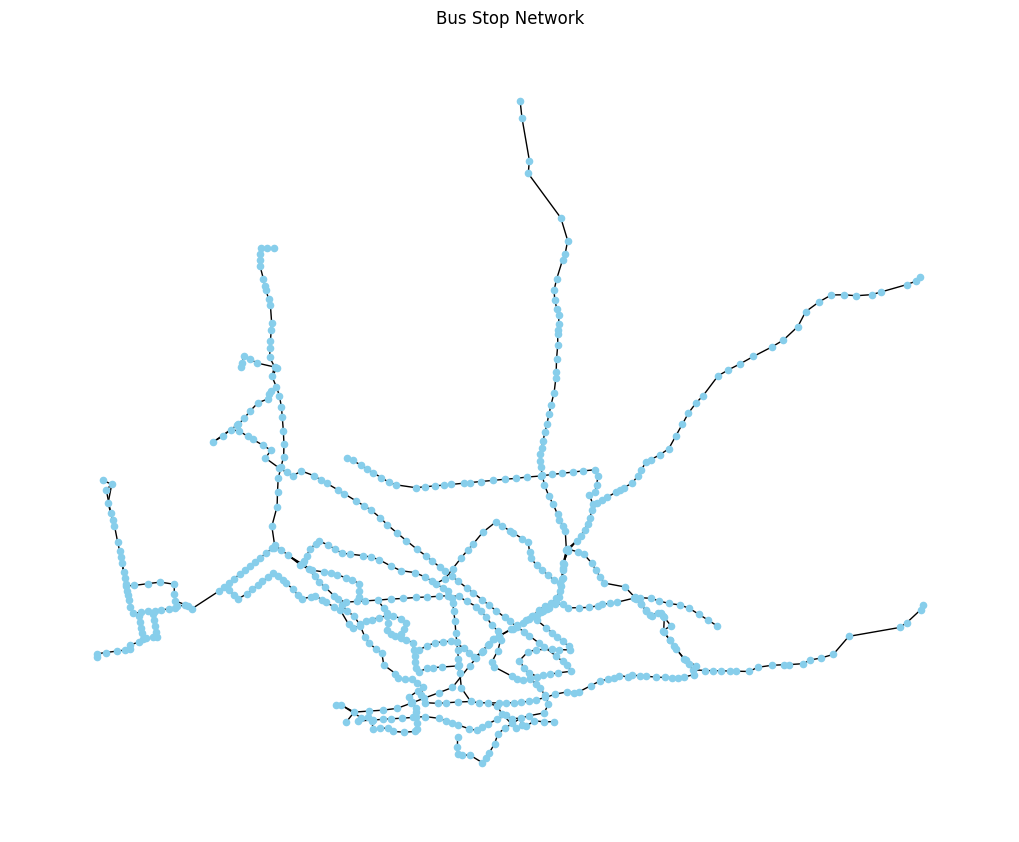

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'data' and 'graph' are already defined from the previous code

# Extract node positions (longitude and latitude)
node_positions = {}
for node_data in data['nodes']:
    node_id = node_data.get('bus_stop')  # Assuming 'bus_stop' is the node ID
    longitude = node_data.get('lon')
    latitude = node_data.get('lat')
    if node_id and longitude and latitude:
        node_positions[node_id] = (longitude, latitude)

# Create the graph plot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed

# Draw nodes with positions
nx.draw(graph, pos=node_positions, with_labels=False, node_size=20, node_color="skyblue")

# Customize the plot (optional)
plt.title("Bus Stop Network")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Selected random edge: (5206, 5312)


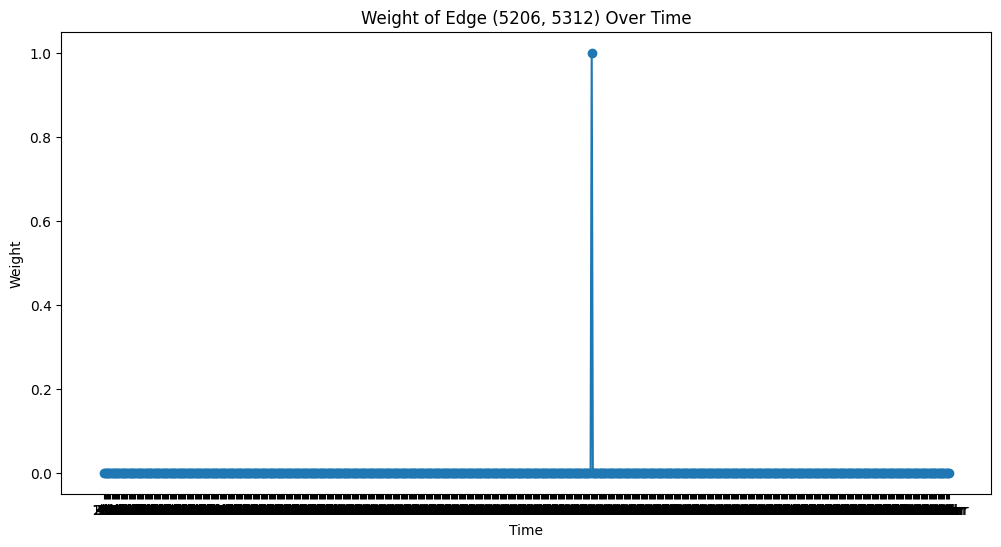

In [ ]:
import random

def plot_random_edge_weights(graph_dict):
    # Get a list of all unique edges across all time points
    all_edges = set()
    for edges_with_weights in graph_dict.values():
        all_edges.update(edges_with_weights.keys())

    if not all_edges:
        print("No edges found in the graph data.")
        return

    # Choose a random edge
    random_edge = random.choice(list(all_edges))
    source, target = random_edge

    print(f"Selected random edge: ({source}, {target})")

    # Extract weights for the chosen edge over time
    weights_over_time = []
    sheet_names = list(graph_dict.keys())

    for sheet_name in sheet_names:
        edges_with_weights = graph_dict[sheet_name]
        weight = edges_with_weights.get(random_edge, 0)  # Get weight, default to 0 if edge doesn't exist
        weights_over_time.append(weight)

    # Prepare labels for the x-axis
    time_labels = [f"{i+1}hr" for i in range(len(sheet_names))]

    # Plot the weights over time
    plt.figure(figsize=(12, 6))
    plt.plot(time_labels, weights_over_time, marker='o', linestyle='-')
    plt.xlabel("Time")
    plt.ylabel("Weight")
    plt.title(f"Weight of Edge ({source}, {target}) Over Time")
    plt.grid(False)
    plt.show()

# Assuming graph_dict is already defined from the previous code
# Call the function to plot the random edge weights
plot_random_edge_weights(graph_dict)

# Hallando las metricas de Centralidad

### Cambiando DataFrame para t_1, etc

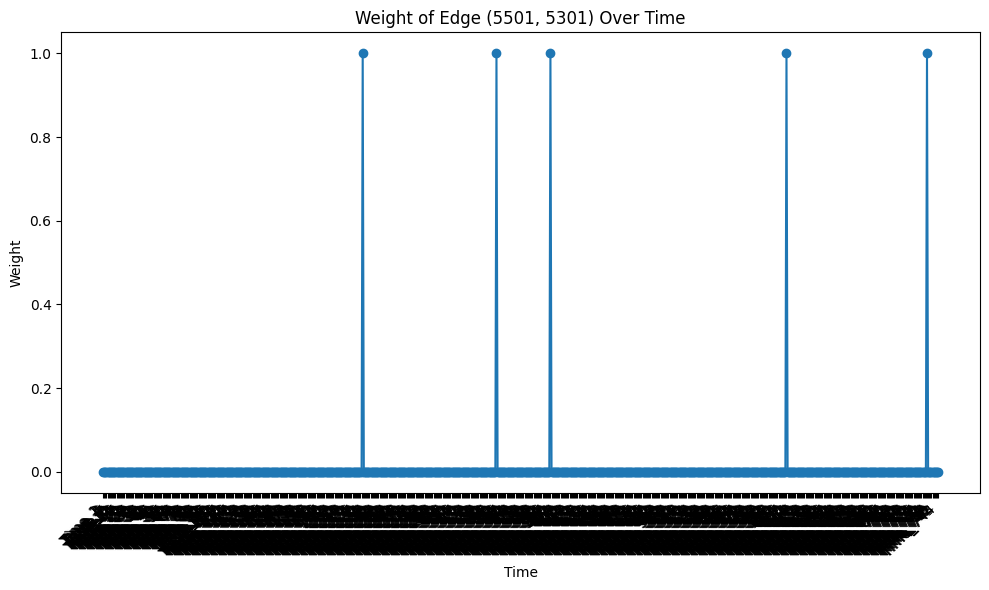

In [ ]:


# Rename keys in graph_dict_sub
new_graph_dict_sub = {}
for i, (key, value) in enumerate(graph_dict.items()):
    new_key = f"Time_{i+1}"  # Create new key name
    new_graph_dict_sub[new_key] = value

graph_dict = new_graph_dict_sub # Update the dictionary


# Now you can use graph_dict_sub with the new keys

# Example usage (similar to your existing plotting code)
# Choose a random edge
first_key, first_value = random.choice(list(graph_dict.items()))
random_edge = random.choice(list(first_value.keys()))
weight = first_value[random_edge]

# Prepare data for plotting
times = list(graph_dict.keys())
weights = [graph_dict[time].get(random_edge, 0) for time in times]  # Use .get() to handle missing edges


# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(times, weights, marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Weight")
plt.title(f"Weight of Edge {random_edge} Over Time")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Como es random, mejor no mover abajo

Selected random edge: (3908, 1586)


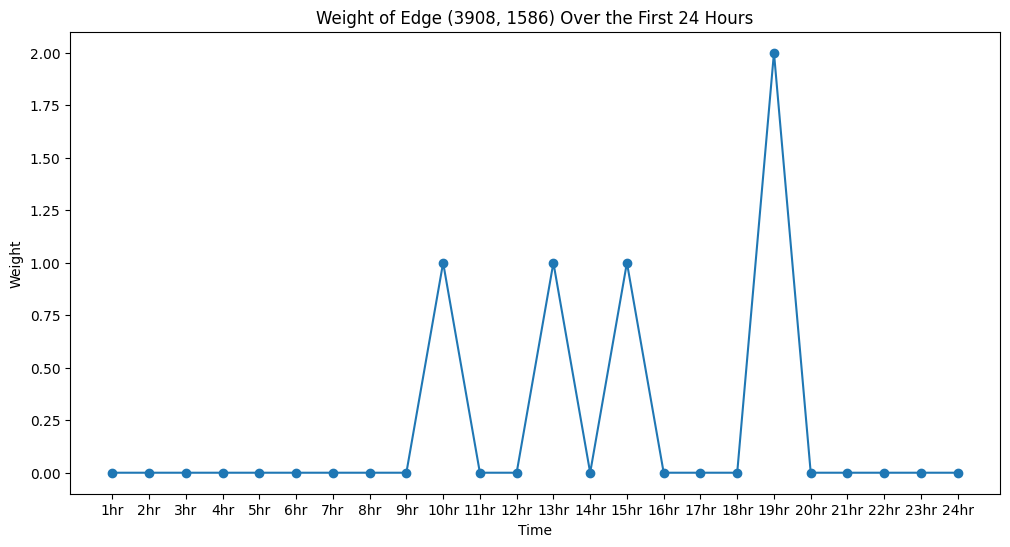

In [ ]:


def plot_random_edge_weights_24hr(graph_dict):
    # Get a list of all unique edges across the first 24 time points
    all_edges = set()
    # We only consider the first 24 time points
    for edges_with_weights in list(graph_dict.values())[:24]:
        all_edges.update(edges_with_weights.keys())

    if not all_edges:
        print("No edges found in the graph data within the first 24 hours.")
        return

    # Choose a random edge from the edges present in the first 24 hours
    random_edge = random.choice(list(all_edges))
    source, target = random_edge

    print(f"Selected random edge: ({source}, {target})")

    # Extract weights for the chosen edge over the first 24 time points
    weights_over_time = []
    # We only consider the first 24 time points
    sheet_names = list(graph_dict.keys())[:24]

    for sheet_name in sheet_names:
        edges_with_weights = graph_dict[sheet_name]
        weight = edges_with_weights.get(random_edge, 0)  # Get weight, default to 0 if edge doesn't exist
        weights_over_time.append(weight)

    # Prepare labels for the x-axis
    time_labels = [f"{i+1}hr" for i in range(len(sheet_names))]

    # Plot the weights over time
    plt.figure(figsize=(12, 6))
    plt.plot(time_labels, weights_over_time, marker='o', linestyle='-')
    plt.xlabel("Time")
    plt.ylabel("Weight")
    plt.title(f"Weight of Edge ({source}, {target}) Over the First 24 Hours")
    plt.grid(False)
    plt.show()

# Assuming graph_dict is already defined from the previous code
# Call the function to plot the random edge weights for 24 hours
plot_random_edge_weights_24hr(graph_dict)

In [ ]:
graph_dict.keys()

dict_keys(['Time_1', 'Time_2', 'Time_3', 'Time_4', 'Time_5', 'Time_6', 'Time_7', 'Time_8', 'Time_9', 'Time_10', 'Time_11', 'Time_12', 'Time_13', 'Time_14', 'Time_15', 'Time_16', 'Time_17', 'Time_18', 'Time_19', 'Time_20', 'Time_21', 'Time_22', 'Time_23', 'Time_24', 'Time_25', 'Time_26', 'Time_27', 'Time_28', 'Time_29', 'Time_30', 'Time_31', 'Time_32', 'Time_33', 'Time_34', 'Time_35', 'Time_36', 'Time_37', 'Time_38', 'Time_39', 'Time_40', 'Time_41', 'Time_42', 'Time_43', 'Time_44', 'Time_45', 'Time_46', 'Time_47', 'Time_48', 'Time_49', 'Time_50', 'Time_51', 'Time_52', 'Time_53', 'Time_54', 'Time_55', 'Time_56', 'Time_57', 'Time_58', 'Time_59', 'Time_60', 'Time_61', 'Time_62', 'Time_63', 'Time_64', 'Time_65', 'Time_66', 'Time_67', 'Time_68', 'Time_69', 'Time_70', 'Time_71', 'Time_72', 'Time_73', 'Time_74', 'Time_75', 'Time_76', 'Time_77', 'Time_78', 'Time_79', 'Time_80', 'Time_81', 'Time_82', 'Time_83', 'Time_84', 'Time_85', 'Time_86', 'Time_87', 'Time_88', 'Time_89', 'Time_90', 'Time_91

### Number of nodes and edges :
Number of nodes: 675 \\
Number of edges: 690 \\
Number time steps: 1-744(hrs)


## Optimize Djkstra Algorithm (Flow-Based Cost and Normalization)

## Optimize Closeness Centrality

In [ ]:
import networkx as nx
import heapq
import numpy as np

# -------------------------------
# Optimized Temporal Dijkstra
# -------------------------------
def dijkstra_temporal_optimized(graph, source, target, edge_weights):
    """
    Computes the temporal shortest path using Dijkstra’s algorithm with flow-based costs.

    Args:
        graph: The networkx graph.
        source: Source node.
        target: Target node.
        edge_weights: Dict: keys = 'Time_t', values = {(u,v): flow}

    Returns:
        (shortest path, total cost) or (None, inf) if unreachable.
    """
    num_timesteps = len(edge_weights)
    distances = {node: float('inf') for node in graph.nodes()}
    paths = {node: [source] for node in graph.nodes()}
    distances[source] = 0
    priority_queue = [(0, source, 0)]  # (distance, node, timestep)
    visited = set()

    while priority_queue:
        current_distance, current_node, current_time = heapq.heappop(priority_queue)

        if current_node == target:
            return paths[target], current_distance

        if (current_node, current_time) in visited:
            continue
        visited.add((current_node, current_time))

        for t in range(current_time, num_timesteps):
            next_time_weights = edge_weights.get(f"Time_{t+1}", {})
            for neighbor in graph.neighbors(current_node):
                if (current_node, neighbor) in next_time_weights:
                    flow = next_time_weights[(current_node, neighbor)]
                    if flow <= 0:
                        continue  # avoid division by zero or invalid flow
                    weight = 1.0 / (flow + 1e-5)  # Flow-based cost
                    distance = current_distance + weight
                    if distance < distances[neighbor]:
                        distances[neighbor] = distance
                        paths[neighbor] = paths[current_node] + [neighbor]
                        heapq.heappush(priority_queue, (distance, neighbor, t + 1))

    return None, float('inf')

# -------------------------------
# Temporal Closeness Centrality
# -------------------------------
def temporal_closeness_centrality_optimized(graph, edge_weights):
    """
    Computes flow-aware temporal closeness centrality, then normalizes.

    Args:
        graph: NetworkX graph
        edge_weights: dict with time steps (e.g., 'Time_1') and flow dictionaries

    Returns:
        normalized centrality dict (0 to 1)
    """
    raw_centrality = {}
    for source_node in graph.nodes():
        total_distance = 0
        reachable_nodes = 0
        for target_node in graph.nodes():
            if source_node != target_node:
                _, dist = dijkstra_temporal_optimized(graph, source_node, target_node, edge_weights)
                if dist != float('inf'):
                    total_distance += dist
                    reachable_nodes += 1

        if reachable_nodes > 0 and total_distance > 0:
            raw_centrality[source_node] = (reachable_nodes ** 2) / total_distance
        else:
            raw_centrality[source_node] = 0.0

    # Normalize to [0, 1] by max value
    max_centrality = max(raw_centrality.values()) if raw_centrality else 1.0
    normalized_centrality = {
        node: raw_centrality[node] / max_centrality if max_centrality > 0 else 0.0
        for node in graph.nodes()
    }

    return normalized_centrality


### using

### Month Data(do not excute)

In [ ]:
#1hora para 744 time steps
temporal_closeness_centrality_optimized_corr = temporal_closeness_centrality_optimized(graph, graph_dict)
print("Normalized Temporal Closeness:")
for node, value in temporal_closeness_centrality_optimized_corr.items():
    print(f"{node}: {value:.6f}")

Normalized Temporal Closeness:
5289: 0.079925
5290: 0.078677
5291: 0.114099
5292: 0.113403
5293: 0.104514
2510: 0.127484
2511: 0.103449
2512: 0.090580
2513: 0.097561
2514: 0.090000
2515: 0.065667
2516: 0.060873
2518: 0.058241
5199: 0.064533
2519: 0.074068
2520: 0.101055
2521: 0.092474
2522: 0.092166
2523: 0.094947
2524: 0.110975
2022: 0.113637
2023: 0.107979
2525: 0.097770
2526: 0.128422
2527: 0.115601
2528: 0.107983
2529: 0.122291
2530: 0.124704
2531: 0.164325
2532: 0.151916
2533: 0.150644
2534: 0.136291
2535: 0.129126
2536: 0.230225
2537: 0.316960
2538: 0.312660
2540: 0.268769
2541: 0.289393
2542: 0.295666
2543: 0.315904
2544: 0.468383
3209: 0.471291
2546: 0.469798
2547: 0.449312
2548: 0.321566
3215: 0.401618
3216: 0.405188
2549: 0.277969
3217: 0.327117
3219: 0.282722
3221: 0.248350
3223: 0.208565
3225: 0.187499
3227: 0.181153
3228: 0.160348
3230: 0.141558
3231: 0.239963
3232: 0.224427
3233: 0.213469
4207: 0.216721
3241: 0.187997
4908: 0.196639
4010: 0.223234
4012: 0.205257
3912: 0.1

In [ ]:


import json

file_path = 'temporal_closeness_centrality_optimized_corr.json'

with open(file_path, 'w') as f:
    json.dump(temporal_closeness_centrality_optimized_corr, f)

print(f"Data saved to {file_path}")


Data saved to temporal_closeness_centrality_optimized_corr.json


In [ ]:
import heapq

def top_10_nodes(centrality_scores):
  """
  Returns the top 10 nodes with the highest centrality scores.

  Args:
    centrality_scores: A dictionary where keys are node IDs and values are centrality scores.

  Returns:
    A list of tuples, where each tuple contains a node ID and its centrality score, sorted in descending order of centrality.
  """
  return heapq.nlargest(10, centrality_scores.items(), key=lambda item: item[1])


top_nodes_temporal_closeness_centrality_optimized_corr = top_10_nodes(temporal_closeness_centrality_optimized_corr)
print("Top 10 nodes with highest temporal closeness centrality:")
for node, centrality in top_nodes_temporal_closeness_centrality_optimized_corr:
    print(f"Node {node}: {centrality}")

Top 10 nodes with highest temporal closeness centrality:
Node 2108: 1.0
Node 1568: 0.5099616918403198
Node 6242: 0.49518278266254123
Node 5958: 0.4762890767381938
Node 3209: 0.47129100949017766
Node 2546: 0.46979836204844855
Node 2544: 0.46838303051207686
Node 1208: 0.45748401745621986
Node 4890: 0.45703478783747037
Node 1205: 0.4567615809204843


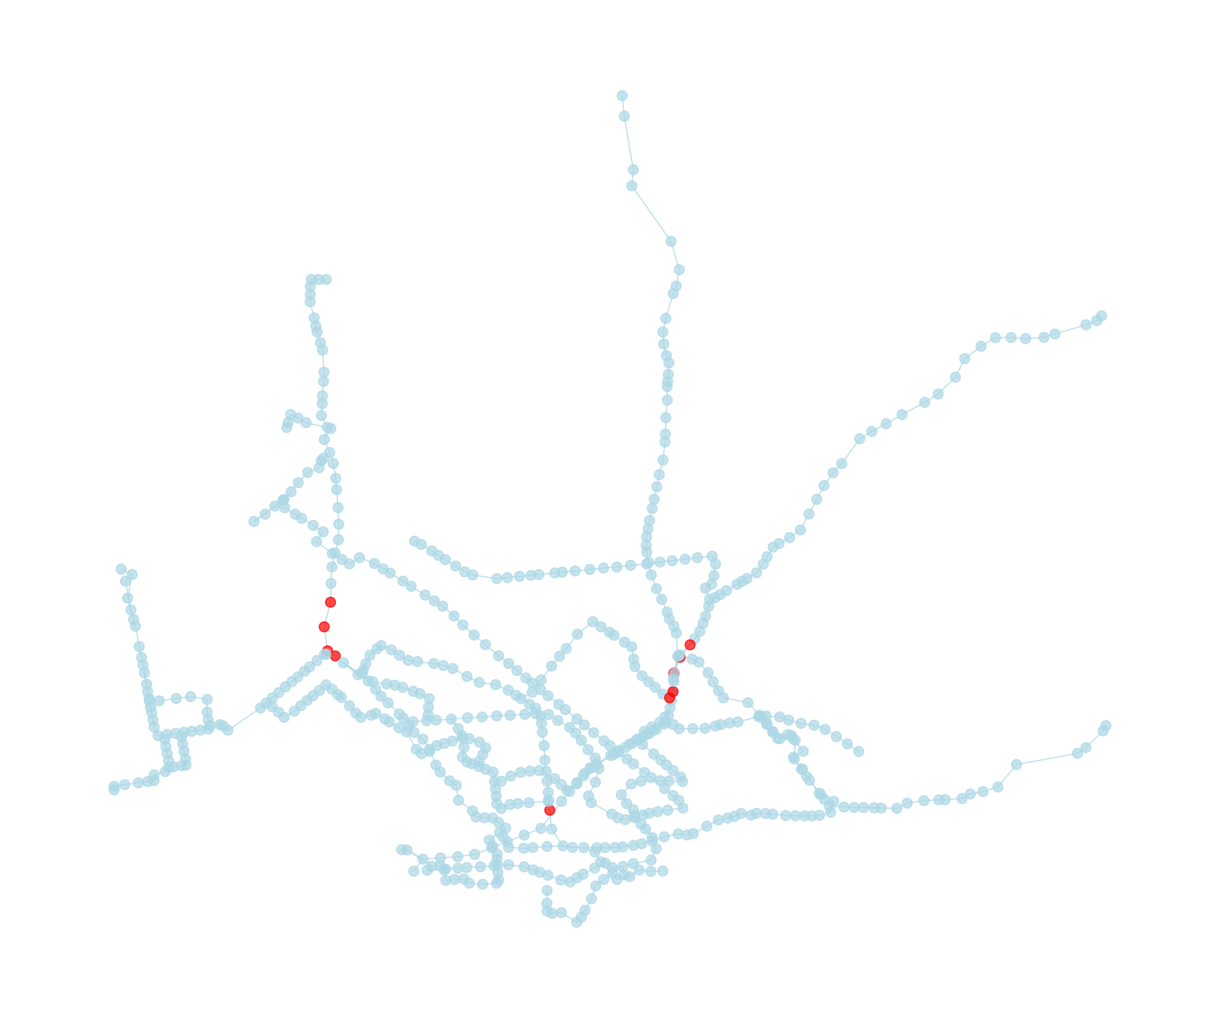

In [ ]:
top_10_corr_month = [node for node, centrality in top_nodes_temporal_closeness_centrality_optimized_corr]

# Define node colors
node_colors = []
for node in graph.nodes():
    if node in top_10_corr_month:
        node_colors.append('red')
    else:
        node_colors.append('lightblue')

# Plot the graph with highlighted nodes
plt.figure(figsize=(12, 10))
nx.draw(graph, pos=node_positions, with_labels=False, node_size=50, node_color=node_colors, alpha=0.7, edge_color='lightblue')
#plt.title("Highways with Top 10 Central Nodes Highlighted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

##24Hrs Data used at Paper

In [ ]:
# Assuming graph_dict is already defined and contains the edge weights for different time steps
# We will compute closeness centrality for the first 24 time steps
# 2min
edge_weights_24 = {key: graph_dict[key] for key in list(graph_dict.keys())[:24]}

# Compute temporal closeness centrality for all nodes within the first 24 time steps
temporal_closeness_centrality_optimized_24hr_corr = temporal_closeness_centrality_optimized(graph, edge_weights_24)

# Print the temporal closeness centrality for each node
print("Normalized Temporal Closeness:")
for node, value in temporal_closeness_centrality_optimized_24hr_corr.items():
    print(f"{node}: {value:.6f}")

Normalized Temporal Closeness:
5289: 0.019231
5290: 0.000000
5291: 0.025641
5292: 0.019231
5293: 0.000000
2510: 0.057693
2511: 0.030770
2512: 0.028846
2513: 0.025641
2514: 0.028846
2515: 0.025641
2516: 0.019231
2518: 0.000000
5199: 0.019231
2519: 0.000000
2520: 0.051282
2521: 0.076923
2522: 0.000000
2523: 0.054656
2524: 0.046154
2022: 0.067084
2023: 0.057693
2525: 0.051924
2526: 0.034188
2527: 0.034616
2528: 0.038462
2529: 0.019231
2530: 0.000000
2531: 0.058275
2532: 0.042441
2533: 0.058287
2534: 0.047746
2535: 0.041806
2536: 0.047338
2537: 0.190982
2538: 0.185440
2540: 0.057692
2541: 0.000000
2542: 0.057692
2543: 0.128509
2544: 0.225321
3209: 0.252001
2546: 0.273406
2547: 0.159277
2548: 0.095491
3215: 0.127587
3216: 0.119908
2549: 0.061078
3217: 0.282691
3219: 0.258173
3221: 0.256910
3223: 0.254436
3225: 0.207582
3227: 0.288790
3228: 0.214047
3230: 0.176160
3231: 0.127321
3232: 0.122172
3233: 0.077344
4207: 0.079050
3241: 0.060348
4908: 0.096286
4010: 0.097337
4012: 0.092434
3912: 0.0

In [ ]:
import heapq

def top_10_nodes(centrality_scores):
  """
  Returns the top 10 nodes with the highest centrality scores.

  Args:
    centrality_scores: A dictionary where keys are node IDs and values are centrality scores.

  Returns:
    A list of tuples, where each tuple contains a node ID and its centrality score, sorted in descending order of centrality.
  """
  return heapq.nlargest(10, centrality_scores.items(), key=lambda item: item[1])


top_nodes_opt_24corr = top_10_nodes(temporal_closeness_centrality_optimized_24hr_corr)
print("Top 10 nodes with highest temporal closeness centrality:")
for node, centrality in top_nodes_opt_24corr:
    print(f"Node {node}: {centrality}")

Top 10 nodes with highest temporal closeness centrality:
Node 4136: 1.0
Node 4135: 0.9782608412098401
Node 2108: 0.5769232396449078
Node 1568: 0.5196292596805752
Node 5958: 0.40227123911412155
Node 1192: 0.3151700320263387
Node 2002: 0.3142858514913116
Node 3227: 0.2887903133808424
Node 1569: 0.28402533770083105
Node 3217: 0.282691434532283


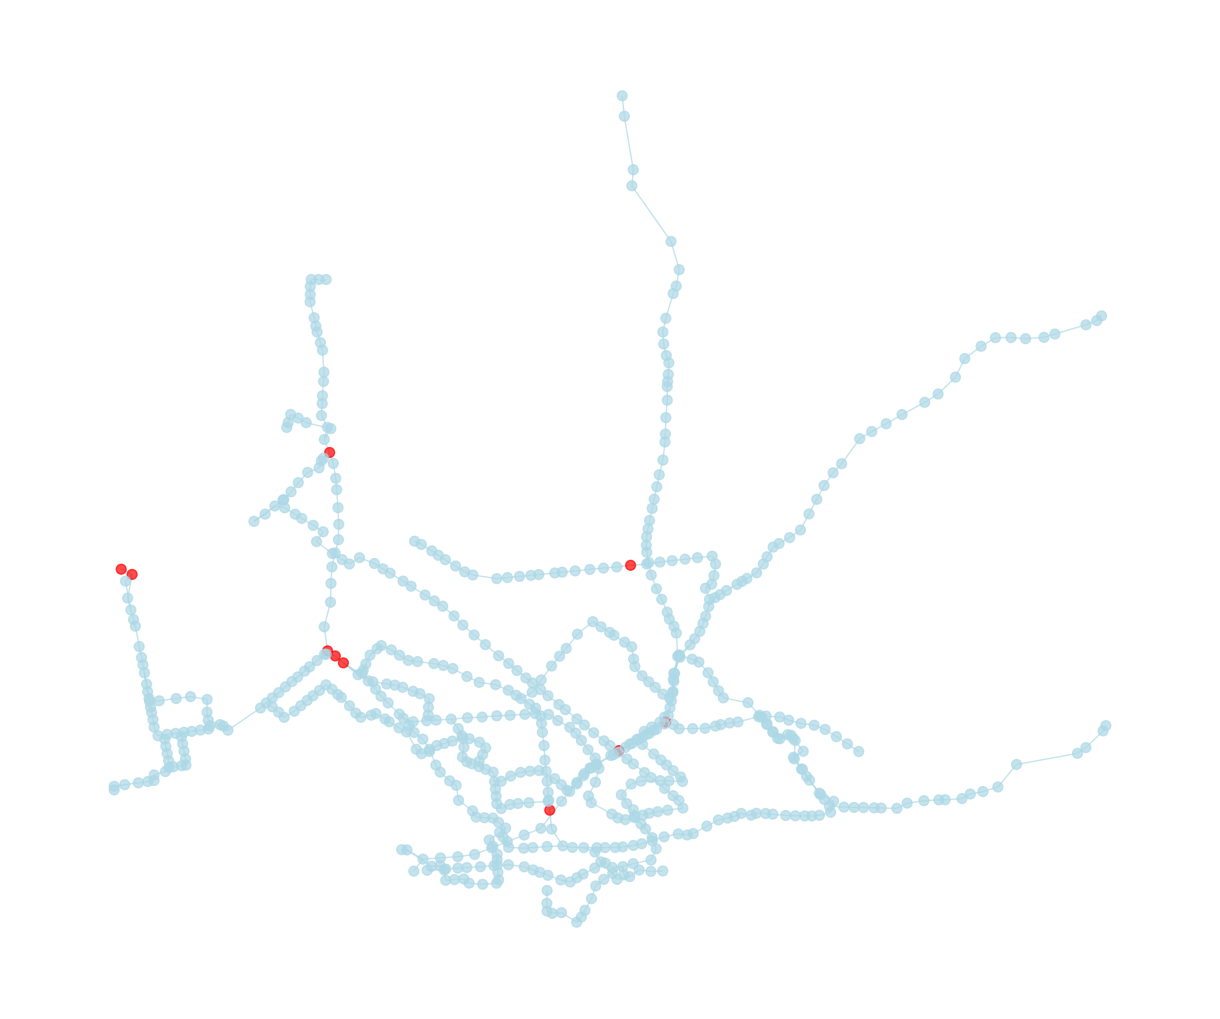

In [ ]:
top_10_corr = [node for node, centrality in top_nodes_opt_24corr]

# Define node colors
node_colors = []
for node in graph.nodes():
    if node in top_10_corr:
        node_colors.append('red')
    else:
        node_colors.append('lightblue')

# Plot the graph with highlighted nodes
plt.figure(figsize=(12, 10))
nx.draw(graph, pos=node_positions, with_labels=False, node_size=50, node_color=node_colors, alpha=0.7, edge_color='lightblue')
#plt.title("Highways with Top 10 Central Closeness Centrality Optimized")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

\documentclass{article}
\usepackage{amsmath, amssymb, geometry}
\geometry{margin=1in}
\title{Temporal Closeness Centrality in Transport Networks}
\author{}
\date{}

\begin{document}

\maketitle

\section\*{1. Temporal Graph Definition}

We define a temporal graph $G = (V, E, T)$, where:
\begin{itemize}
\item $V$ is the set of nodes (e.g., bus stops),
\item $E_t \subseteq V \times V$ is the set of directed edges at time step $t \in \{1, 2, \dots, T\}$,
\item $w_{ij}(t)$ is the edge weight (cost) from node $i$ to $j$ at time $t$, derived from flow.
\end{itemize}

\section\*{2. Edge Cost Function Based on Flow}

We define the cost of traversing an edge $(i, j)$ at time $t$ as:

$$
\text{cost}_{ij}(t) =
\begin{cases}
\frac{1}{\text{flow}_{ij}(t)} & \text{if } (i, j) \in E_t \text{ and } \text{flow}_{ij}(t) > 0 \\
\infty & \text{otherwise}
\end{cases}
$$

This implies that higher flow indicates lower travel cost, promoting high-flow paths.

\section\*{3. Temporal Dijkstra Algorithm}

To compute the shortest temporal path from a source node $i$ to all others:

\subsection\*{Initialization:}
\begin{align\*}
& d\_i(j) = \infty, \quad \forall j \in V, j \ne i \\
& d\_i(i) = 0 \\
& \text{Priority queue: } Q = {(0, i, 0)} \quad \text{(distance, node, time)}
\end{align\*}

\subsection\*{Update Rule:}
For each node $u$ dequeued at time $t$, for all $v \in \mathcal{N}(u)$ at $t+1$:

$$
d_i(v) > d_i(u) + \text{cost}_{uv}(t+1) \Rightarrow
\begin{cases}
d_i(v) \leftarrow d_i(u) + \text{cost}_{uv}(t+1) \\
Q \leftarrow Q \cup \{(d_i(v), v, t+1)\}
\end{cases}
$$

\section\*{4. Reachability Term $R_i$}

$R_i$ denotes the number of reachable nodes from $i$:

$$
R_i = |\{ j \in V \setminus \{i\} : d_i(j) < \infty \}|
$$

\section\*{5. Temporal Closeness Centrality}

We define the temporal closeness of node $i$ as:

$$
C_T(i) = \frac{R_i^2}{\sum\limits_{j \in V \setminus \{i\}} d_i(j)}
$$

This formulation balances reachability and efficiency.

\section\*{6. Normalization}

We normalize to ensure values are between 0 and 1:

$$
C_T^{\text{norm}}(i) = \frac{R_i}{\sum\limits_{j \in V \setminus \{i\}} d_i(j)}
$$

Optionally, normalize by graph size:

$$
C_T^{\text{norm2}}(i) = \frac{1}{|V|-1} \cdot \frac{R_i}{\text{average distance}}
$$

\section\*{7. Interpretation}

\begin{itemize}
\item High $C_T(i)$: Node reaches many others quickly via high-flow paths.
\item Low $C_T(i)$: Node is isolated or paths are slow/low-flow.
\end{itemize}

\end{document}
